# Implement Data GARCH model

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from arch import arch_model

# Load and Explore the Dataset
Load the dataset from 'TSSDA-Exp12.csv' and perform initial exploration.

   Year  Month  Oklahoma Spot Price  Lousiana Spot Price
0  1988      1                1.875                2.065
1  1988      2                1.898                1.988
2  1988      3                1.643                1.818
3  1988      4                1.332                1.493
4  1988      5                1.262                1.383
              Year      Month  Oklahoma Spot Price  Lousiana Spot Price
count    48.000000  48.000000            48.000000            48.000000
mean   1989.458333   6.500000             1.445604             1.650563
std       1.090741   3.488583             0.265989             0.321874
min    1988.000000   1.000000             1.020000             1.117000
25%    1988.750000   3.750000             1.252000             1.409250
50%    1989.500000   6.500000             1.352500             1.561500
75%    1990.000000   9.250000             1.628500             1.849500
max    1991.000000  12.000000             2.203000             2.420000
Year      

<Axes: title={'center': 'Oklahoma Spot Price'}>

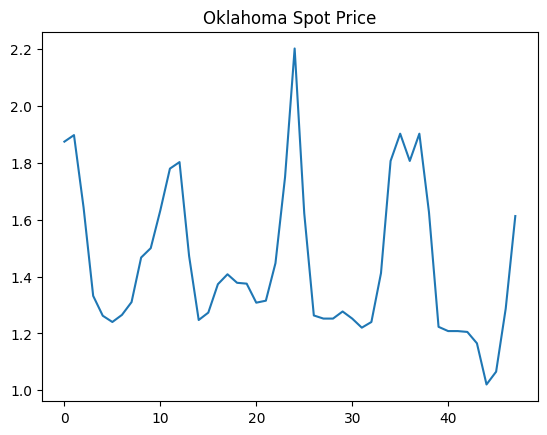

In [8]:
# Load the dataset
data = pd.read_csv('TSSDA-Exp12.csv')

# Display the first few rows of the dataset
print(data.head())

# Display the summary statistics of the dataset
print(data.describe())

# Check for missing values in the dataset
print(data.isnull().sum())

# Plot the Oklahoma Spot Price
data['Oklahoma Spot Price'].plot(title='Oklahoma Spot Price')

<Axes: title={'center': 'Louisiana Spot Price'}>

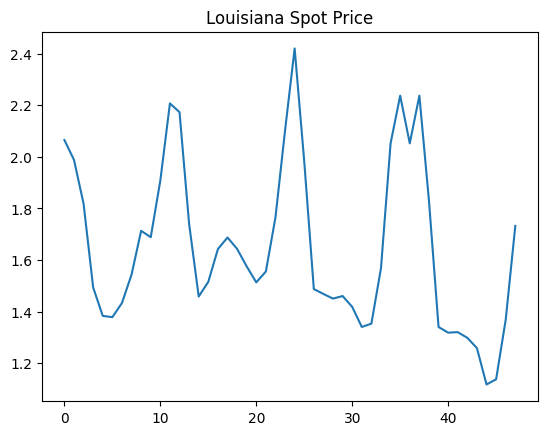

In [9]:
# Plot the Louisiana Spot Price
data['Lousiana Spot Price'].plot(title='Louisiana Spot Price')

# Data Preprocessing
Clean and preprocess the data for analysis, including handling missing values and converting data types if necessary.

In [3]:
# Convert 'Year' and 'Month' columns to datetime format
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Set 'Date' as the index of the dataframe
data.set_index('Date', inplace=True)

# Drop 'Year' and 'Month' columns as they are no longer needed
data.drop(['Year', 'Month'], axis=1, inplace=True)

# Check the data types of the columns to confirm changes
print(data.dtypes)

# Check the first few rows of the updated dataset
print(data.head())

# Check for missing values in the dataset again
print(data.isnull().sum())

# Fill any missing values with the mean of the respective column
data.fillna(data.mean(), inplace=True)

# Check for missing values in the dataset again to confirm changes
print(data.isnull().sum())

# Normalize the 'Oklahoma Spot Price' and 'Lousiana Spot Price' columns for better comparison
data['Oklahoma Spot Price'] = (data['Oklahoma Spot Price'] - data['Oklahoma Spot Price'].mean()) / data['Oklahoma Spot Price'].std()
data['Lousiana Spot Price'] = (data['Lousiana Spot Price'] - data['Lousiana Spot Price'].mean()) / data['Lousiana Spot Price'].std()

# Check the first few rows of the updated dataset
print(data.head())

Oklahoma Spot Price    float64
Lousiana Spot Price    float64
dtype: object
            Oklahoma Spot Price  Lousiana Spot Price
Date                                                
1988-01-01                1.875                2.065
1988-02-01                1.898                1.988
1988-03-01                1.643                1.818
1988-04-01                1.332                1.493
1988-05-01                1.262                1.383
Oklahoma Spot Price    0
Lousiana Spot Price    0
dtype: int64
Oklahoma Spot Price    0
Lousiana Spot Price    0
dtype: int64
            Oklahoma Spot Price  Lousiana Spot Price
Date                                                
1988-01-01             1.614336             1.287577
1988-02-01             1.700806             1.048353
1988-03-01             0.742120             0.520196
1988-04-01            -0.427101            -0.489516
1988-05-01            -0.690270            -0.831265


# Implement OLS Model
Implement an Ordinary Least Squares (OLS) regression model as a precursor to the GARCH model.

In [4]:
# Define the dependent variable and the independent variable
Y = data['Oklahoma Spot Price']
X = data['Lousiana Spot Price']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Implement the Ordinary Least Squares Model
model = sm.OLS(Y, X)

# Fit the model
results = model.fit()

# Print the summary statistics of the regression model
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Oklahoma Spot Price   R-squared:                       0.950
Model:                             OLS   Adj. R-squared:                  0.949
Method:                  Least Squares   F-statistic:                     871.4
Date:                 Mon, 01 Apr 2024   Prob (F-statistic):           1.52e-31
Time:                         08:27:06   Log-Likelihood:                 4.2266
No. Observations:                   48   AIC:                            -4.453
Df Residuals:                       46   BIC:                           -0.7107
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.7

# Implement GARCH Model
Implement a Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model to analyze the volatility of the spot prices.

In [5]:
# Implement the GARCH model
# We will use the residuals from the OLS model as input for the GARCH model
residuals = results.resid

# Define the GARCH model
garch = arch_model(residuals, vol='Garch', p=1, q=1)

# Fit the GARCH model
garch_fit = garch.fit(disp='off')

# Print the summary of the GARCH model
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                11.3677
Distribution:                  Normal   AIC:                          -14.7355
Method:            Maximum Likelihood   BIC:                          -7.25069
                                        No. Observations:                   48
Date:                Mon, Apr 01 2024   Df Residuals:                       47
Time:                        08:27:06   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0648      0.579      0.112      0.911 [ -1.070,  1.19

/home/codespace/.python/current/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0491. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# Model Evaluation
Evaluate the performance of the GARCH model using appropriate metrics and visualizations.

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
1988-01-01  0.064766  0.064766  0.064766  0.064766  0.064766  0.064766   
1988-02-01  0.064766  0.064766  0.064766  0.064766  0.064766  0.064766   
1988-03-01  0.064766  0.064766  0.064766  0.064766  0.064766  0.064766   
1988-04-01  0.064766  0.064766  0.064766  0.064766  0.064766  0.064766   
1988-05-01  0.064766  0.064766  0.064766  0.064766  0.064766  0.064766   
1988-06-01  0.064766  0.064766  0.064766  0.064766  0.064766  0.064766   
1988-07-01  0.064766  0.064766  0.064766  0.064766  0.064766  0.064766   
1988-08-01  0.064766  0.064766  0.064766  0.064766  0.064766  0.064766   
1988-09-01  0.064766  0.064766  0.064766  0.064766  0.064766  0.064766   
1988-10-01  0.064766  0.064766  0.064766  0.064766  0.064766  0.064766   
1988-11-01  0.064766  0.064766  0.064766  0.064766  0.064766  0.064766   
1988-12-01  0.064766  0.064766  0.0647

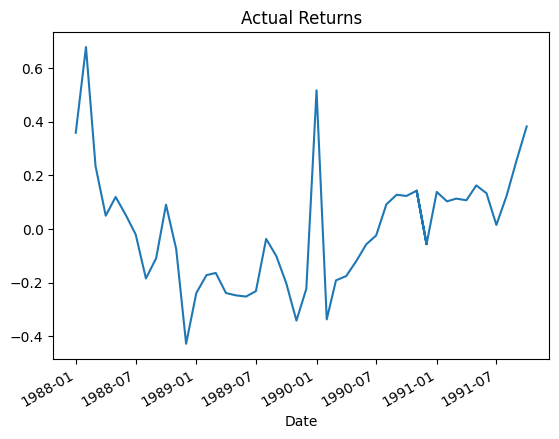

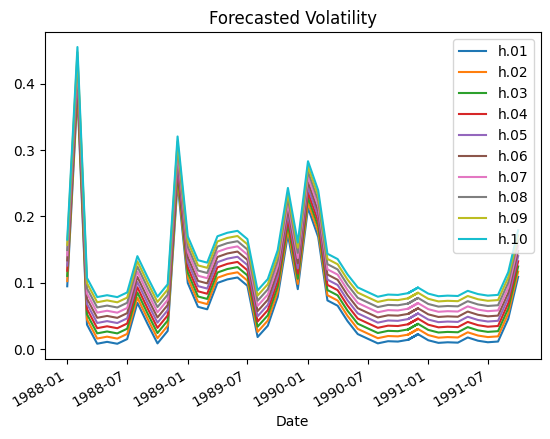

In [10]:
# Predict the next 10 values
forecasts = garch_fit.forecast(start=0, horizon=10)

# Print the forecast mean and variance
print(forecasts.mean)
print(forecasts.variance)

# Check if there are any NaN values in the forecasted variance
if forecasts.variance.isna().any().any():
    print("Warning: NaN values found in the forecasted variance.")

# Plot the actual returns
residuals.plot(title='Actual Returns')

# Plot the forecasted standard deviations
forecasts.variance.dropna().plot(title='Forecasted Volatility')

# Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(residuals, garch_fit.conditional_volatility)
print(f'Mean Absolute Error: {mae}')

# Calculate the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(residuals, garch_fit.conditional_volatility)
print(f'Mean Squared Error: {mse}')

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')